# AI-deteciton using extended (Standard, Wavelet 1, Wavelet 2, LoG) features from separate RGB channels

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

## Set the seed for reproducibility

In [2]:
SEED = 44
np.random.seed(SEED)
random.seed(SEED)

## Load the data

In [3]:
def skip_half_rows(x):
    # x is the row id 
    # is function evaluates to 
    # True the row is skipped
    # NOTE: index numbering starts with the first line of file, so column row has the id = 0
    return not (x % 2 == 0) # keep even indexes

In [4]:
data_path = "/kaggle/input/cifake-all-features/RGB_train_all_features.csv"
df = pd.read_csv(data_path, index_col=0, skiprows=skip_half_rows)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1 to 99999
Columns: 9075 entries, Image to sym3_B_wavelet-L_ngtdm_Strength
dtypes: float64(9015), int64(7), object(53)
memory usage: 3.4+ GB


In [5]:
df.reset_index(inplace=True, drop=True)
df.head()

,Image,Mask,Category,R_diagnostics_Versions_PyRadiomics,R_diagnostics_Versions_Numpy,R_diagnostics_Versions_SimpleITK,R_diagnostics_Versions_PyWavelet,R_diagnostics_Versions_Python,R_diagnostics_Configuration_Settings,R_diagnostics_Configuration_EnabledImageTypes,...,sym3_B_wavelet-L_gldm_LargeDependenceLowGrayLevelEmphasis,sym3_B_wavelet-L_gldm_LowGrayLevelEmphasis,sym3_B_wavelet-L_gldm_SmallDependenceEmphasis,sym3_B_wavelet-L_gldm_SmallDependenceHighGrayLevelEmphasis,sym3_B_wavelet-L_gldm_SmallDependenceLowGrayLevelEmphasis,sym3_B_wavelet-L_ngtdm_Busyness,sym3_B_wavelet-L_ngtdm_Coarseness,sym3_B_wavelet-L_ngtdm_Complexity,sym3_B_wavelet-L_ngtdm_Contrast,sym3_B_wavelet-L_ngtdm_Strength
0,D:\studia_zadania\Others\AIImageDetection\data...,D:\studia_zadania\Others\AIImageDetection\data...,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,0.121249,0.038958,0.627387,88.291938,0.024955,0.244221,0.020355,143.809539,0.135964,2.892842
1,D:\studia_zadania\Others\AIImageDetection\data...,D:\studia_zadania\Others\AIImageDetection\data...,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,0.036432,0.015490,0.690321,146.112196,0.011059,0.117546,0.019500,404.573111,0.066753,6.742380
2,D:\studia_zadania\Others\AIImageDetection\data...,D:\studia_zadania\Others\AIImageDetection\data...,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,0.116522,0.039532,0.740831,93.557671,0.024763,0.339781,0.020632,242.850164,0.080504,6.273661
3,D:\studia_zadania\Others\AIImageDetection\data...,D:\studia_zadania\Others\AIImageDetection\data...,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,0.060377,0.022634,0.691569,115.006402,0.015114,0.155328,0.034512,140.792999,0.054886,8.338564
4,D:\studia_zadania\Others\AIImageDetection\data...,D:\studia_zadania\Others\AIImageDetection\data...,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,0.014221,0.007376,0.672309,199.806532,0.005969,0.092343,0.021758,210.355579,0.083002,6.233881


## Data preparation

### Drop unimportant columns

In [6]:
def drop_columns(df):
    to_drop = list()
    for column in df.columns:
        if df[column].min() == df[column].max():
            to_drop.append(column)
        elif 'diagnostics' in column:
            to_drop.append(column)
        elif column == "Mask":
            to_drop.append(column)
    df.drop(to_drop, axis=1, inplace=True)
    
    # We keep Image column for now to allow for image retrieval and visualization
    # # drop Image column
    # df.drop('Image', axis=1, inplace=True)        
    
           
drop_columns(df)

In [7]:
df.head()

,Image,Category,R_original_firstorder_10Percentile,R_original_firstorder_90Percentile,R_original_firstorder_Energy,R_original_firstorder_Entropy,R_original_firstorder_InterquartileRange,R_original_firstorder_Kurtosis,R_original_firstorder_Maximum,R_original_firstorder_MeanAbsoluteDeviation,...,sym3_B_wavelet-L_gldm_LargeDependenceLowGrayLevelEmphasis,sym3_B_wavelet-L_gldm_LowGrayLevelEmphasis,sym3_B_wavelet-L_gldm_SmallDependenceEmphasis,sym3_B_wavelet-L_gldm_SmallDependenceHighGrayLevelEmphasis,sym3_B_wavelet-L_gldm_SmallDependenceLowGrayLevelEmphasis,sym3_B_wavelet-L_ngtdm_Busyness,sym3_B_wavelet-L_ngtdm_Coarseness,sym3_B_wavelet-L_ngtdm_Complexity,sym3_B_wavelet-L_ngtdm_Contrast,sym3_B_wavelet-L_ngtdm_Strength
0,D:\studia_zadania\Others\AIImageDetection\data...,0,-153.391086,120.029612,10230000.0,3.670559,141.084394,2.319431,238.900718,84.271202,...,0.121249,0.038958,0.627387,88.291938,0.024955,0.244221,0.020355,143.809539,0.135964,2.892842
1,D:\studia_zadania\Others\AIImageDetection\data...,0,-132.478270,128.498206,10230000.0,3.914165,116.933498,3.205715,227.772360,76.847020,...,0.036432,0.015490,0.690321,146.112196,0.011059,0.117546,0.019500,404.573111,0.066753,6.742380
2,D:\studia_zadania\Others\AIImageDetection\data...,0,-150.173419,130.905985,10230000.0,3.962498,125.195835,2.591196,200.543534,78.448574,...,0.116522,0.039532,0.740831,93.557671,0.024763,0.339781,0.020632,242.850164,0.080504,6.273661
3,D:\studia_zadania\Others\AIImageDetection\data...,0,-172.611062,76.488385,10230000.0,3.347248,63.926906,5.074533,154.062608,71.985338,...,0.060377,0.022634,0.691569,115.006402,0.015114,0.155328,0.034512,140.792999,0.054886,8.338564
4,D:\studia_zadania\Others\AIImageDetection\data...,0,-109.267619,70.436673,10230000.0,3.292349,73.348691,5.866269,259.450606,62.626213,...,0.014221,0.007376,0.672309,199.806532,0.005969,0.092343,0.021758,210.355579,0.083002,6.233881


### Split into train and test set

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Category'])
y = df[['Category']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

# save image paths
Images_train = X_train['Image']
Images_test = X_val['Image']

# drop Image column
X_train.drop('Image', axis=1, inplace=True)
X_val.drop('Image', axis=1, inplace=True)

In [9]:
# delete original df and not splitted data to conserve memory
del df
del X
del y

In [10]:
import gc
gc.collect()

0

In [11]:
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_"):
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

|            Variable Name|    Memory|
 ------------------------------------ 
|              Images_test|    721088|
|             Images_train|   6488944|
|                       In|       184|
|                      Out|       232|
|                     SEED|        28|
|                  X_train|3061080016|
|                    X_val| 340120016|
|                data_path|       109|
|             drop_columns|       144|
|                     exit|        48|
|                       gc|        72|
|              get_ipython|        64|
|                       np|        72|
|                     open|       144|
|                       pd|        72|
|                      plt|        72|
|                     quit|        48|
|                   random|        72|
|           skip_half_rows|       144|
|                      sys|        72|
|         train_test_split|       144|
|                  y_train|    720016|
|                    y_val|     80016|


### Scale the data

In [12]:
columns = X_train.columns

X_train = X_train.values
X_val = X_val.values

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=False)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# create df from scaled data
X_train = pd.DataFrame(X_train, columns=columns)
X_val = pd.DataFrame(X_val, columns=columns)

## Model training

In [14]:
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

models = [
    HistGradientBoostingClassifier(random_state=SEED),
    LinearDiscriminantAnalysis(),
    RandomForestClassifier(random_state=SEED),
    LinearSVC(random_state=SEED),
    LogisticRegression(random_state=SEED),
]

model_names = [model.__class__.__name__ for model in models]

for model, name in zip(models, model_names):
    model = model.fit(X_train, y_train.values.ravel())
    print(f"Finished training {name}.")

Finished training HistGradientBoostingClassifier.
Finished training LinearDiscriminantAnalysis.
Finished training RandomForestClassifier.


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Finished training LinearSVC.
Finished training LogisticRegression.


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, \
    confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, X_val, y_val, print_results=True, name=None):
    if name is not None:
        name = model.__class__.__name__
    
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    
    if print_results:
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1: {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
    
    return accuracy, f1, precision, recall

def plot_confusion_matrix(model, X_val, y_val, name=None):
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(name)
    plt.show()

In [16]:
for model, name in zip(models, model_names):
    print()
    evaluate_model(model, X_val, y_val, name=name)


Model: HistGradientBoostingClassifier
Accuracy: 0.9918
F1: 0.9918
Precision: 0.9918
Recall: 0.9918

Model: LinearDiscriminantAnalysis
Accuracy: 0.9986
F1: 0.9986
Precision: 0.9986
Recall: 0.9986

Model: RandomForestClassifier
Accuracy: 0.9790
F1: 0.9790
Precision: 0.9790
Recall: 0.9790

Model: LinearSVC
Accuracy: 0.9958
F1: 0.9958
Precision: 0.9958
Recall: 0.9958

Model: LogisticRegression
Accuracy: 0.9934
F1: 0.9934
Precision: 0.9934
Recall: 0.9934


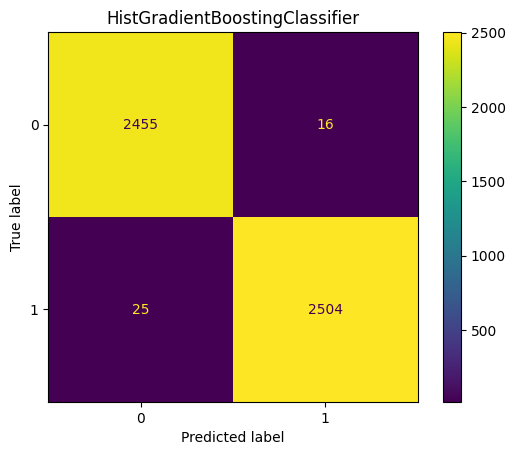

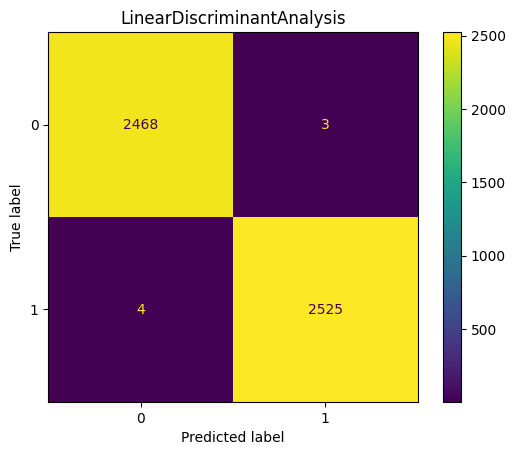

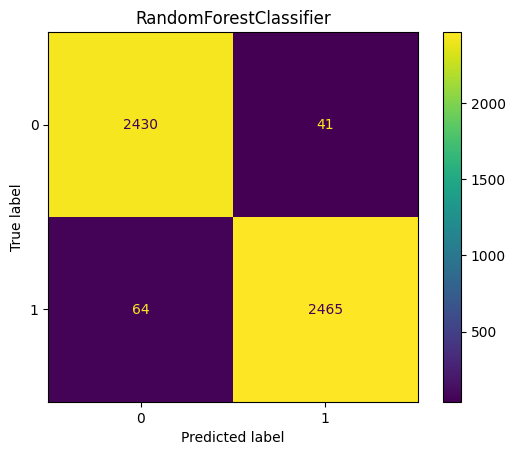

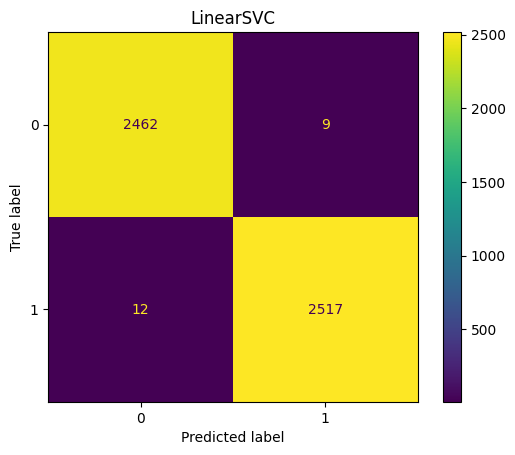

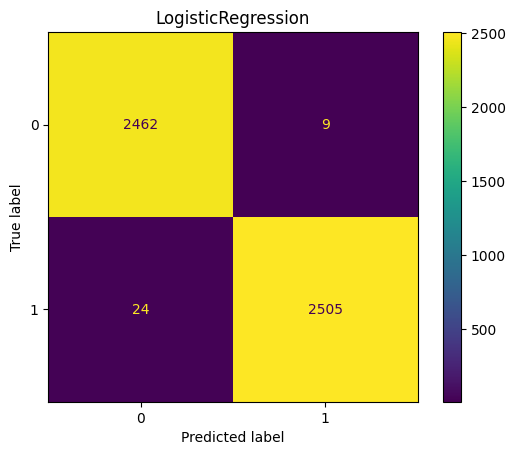

In [17]:
for model, name in zip(models, model_names):
    plot_confusion_matrix(model, X_val, y_val, name=name)

In [18]:
# Plot images and predictions
def plot_images(model, X_val, y_val, img_paths, n_images=5):
    y_pred = model.predict(X_val)
    for i in range(n_images):
        idx = random.randint(0, len(X_val))
        img_path = img_paths.iloc[idx]
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(f"Prediction: {y_pred[idx]}\nActual: {y_val.iloc[idx]}")
        plt.show()

## Save models and scaler

In [19]:
import joblib

for model, name in zip(models, model_names):
    joblib.dump(model, f"{name}.pkl")
    
joblib.dump(scaler, f"scaler.pkl")

['scaler.pkl']

## Evaluate on test data

In [20]:
del X_train
del y_train

gc.collect()

20023

In [21]:
data_path = "/kaggle/input/cifake-all-features/RGB_test_all_features.csv"
df = pd.read_csv(data_path, index_col=0)

In [22]:
X_test = df[models[0].feature_names_in_]
y_test = df["Category"]

In [23]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=models[0].feature_names_in_)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [24]:
for model, name in zip(models, model_names):
    print()
    evaluate_model(model, X_test, y_test, name=name)


Model: HistGradientBoostingClassifier
Accuracy: 0.9884
F1: 0.9884
Precision: 0.9884
Recall: 0.9884

Model: LinearDiscriminantAnalysis
Accuracy: 0.9967
F1: 0.9966
Precision: 0.9967
Recall: 0.9967

Model: RandomForestClassifier
Accuracy: 0.9775
F1: 0.9775
Precision: 0.9775
Recall: 0.9775

Model: LinearSVC
Accuracy: 0.9937
F1: 0.9937
Precision: 0.9937
Recall: 0.9937

Model: LogisticRegression
Accuracy: 0.9939
F1: 0.9938
Precision: 0.9939
Recall: 0.9939


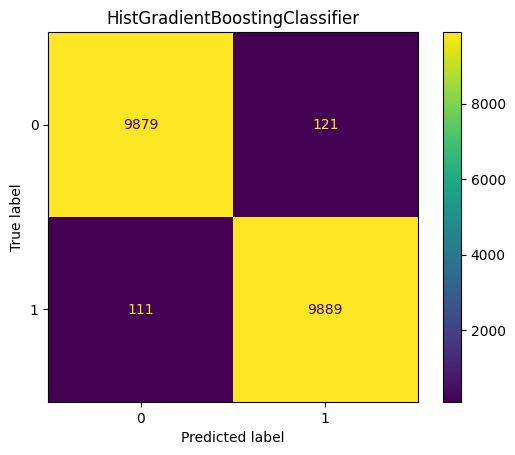

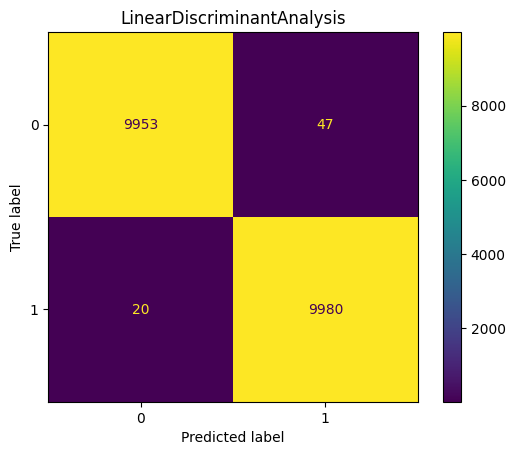

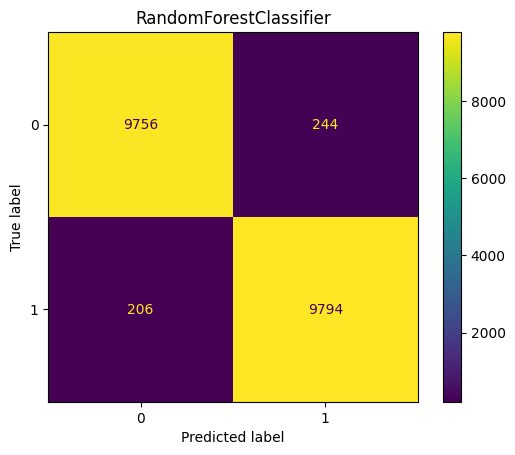

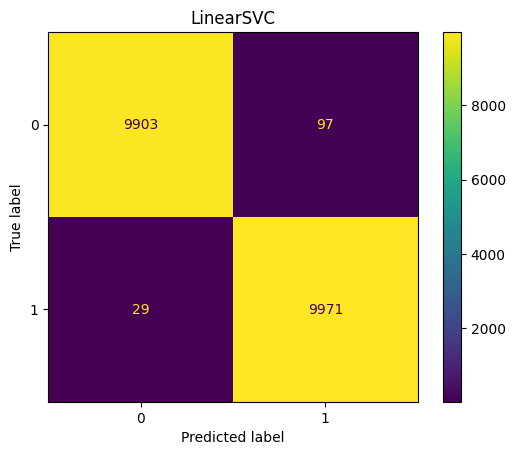

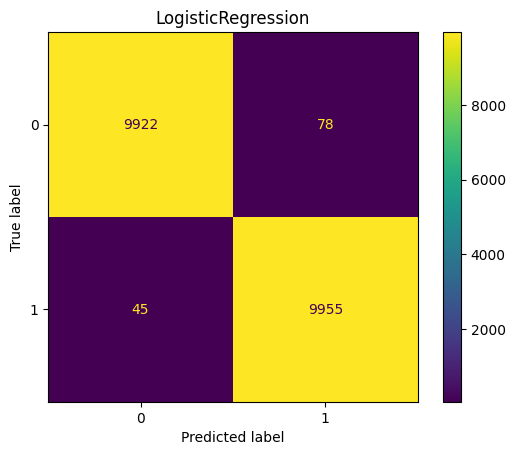

In [25]:
for model, name in zip(models, model_names):
    plot_confusion_matrix(model, X_test, y_test, name=name)